In [1]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
from arch import arch_model
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
def MAE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred)))

def MAPE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred))/(y_true))*100

In [3]:
df = pd.read_csv('Weekly Fuel Prices dataset.csv')
df.head()

,Date,Petrol (USD),Diesel (USD),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,09-06-2003,74.59,76.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16-06-2003,74.47,76.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23-06-2003,74.42,76.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30-06-2003,74.35,76.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,07-07-2003,74.28,76.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,Date,Petrol (USD),Diesel (USD),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
876,23-03-2020,119.64,123.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877,30-03-2020,112.45,118.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878,06-04-2020,110.23,116.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
879,13-04-2020,109.27,116.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,20-04-2020,108.63,115.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(881, 10)

In [6]:
df.drop(['Unnamed: 3', 'Unnamed: 4','Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],axis=1,inplace=True)

In [7]:
time = pd.date_range(start='9/2/2003',periods=881,freq='W')
df['time_stamp'] = pd.DataFrame(time)
df.drop(['Date'],axis=1,inplace=True)
df = df.set_index('time_stamp')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 881 entries, 2003-09-07 to 2020-07-19
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petrol (USD)  881 non-null    float64
 1   Diesel (USD)  881 non-null    float64
dtypes: float64(2)
memory usage: 20.6 KB


In [9]:
df.isnull().sum()

Petrol (USD)    0
Diesel (USD)    0
dtype: int64

In [10]:
df = df[['Petrol (USD)']]

In [11]:
df.columns=['USD']

In [12]:
df

,USD
time_stamp,
2003-09-07,74.59
2003-09-14,74.47
2003-09-21,74.42
2003-09-28,74.35
2003-10-05,74.28
...,...
2020-06-21,119.64
2020-06-28,112.45
2020-07-05,110.23


In [13]:
df.head()

,USD
time_stamp,
2003-09-07,74.59
2003-09-14,74.47
2003-09-21,74.42
2003-09-28,74.35
2003-10-05,74.28


In [14]:
df.tail()

,USD
time_stamp,
2020-06-21,119.64
2020-06-28,112.45
2020-07-05,110.23
2020-07-12,109.27
2020-07-19,108.63


In [15]:
df.shape

(881, 1)

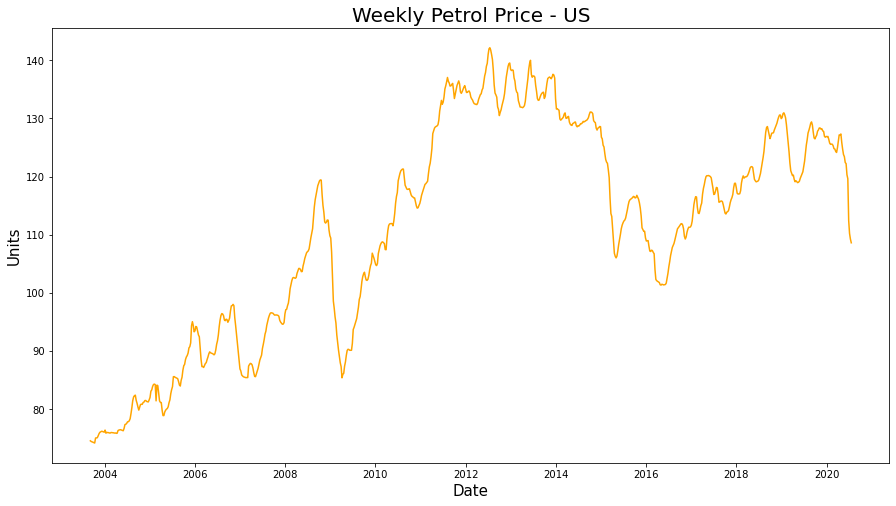

In [16]:
plt.plot(df,color='orange')
plt.title('Weekly Petrol Price - US',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Units',fontsize=15)
plt.show()

In [17]:
plt.rcParams['figure.figsize'] = [15,8]

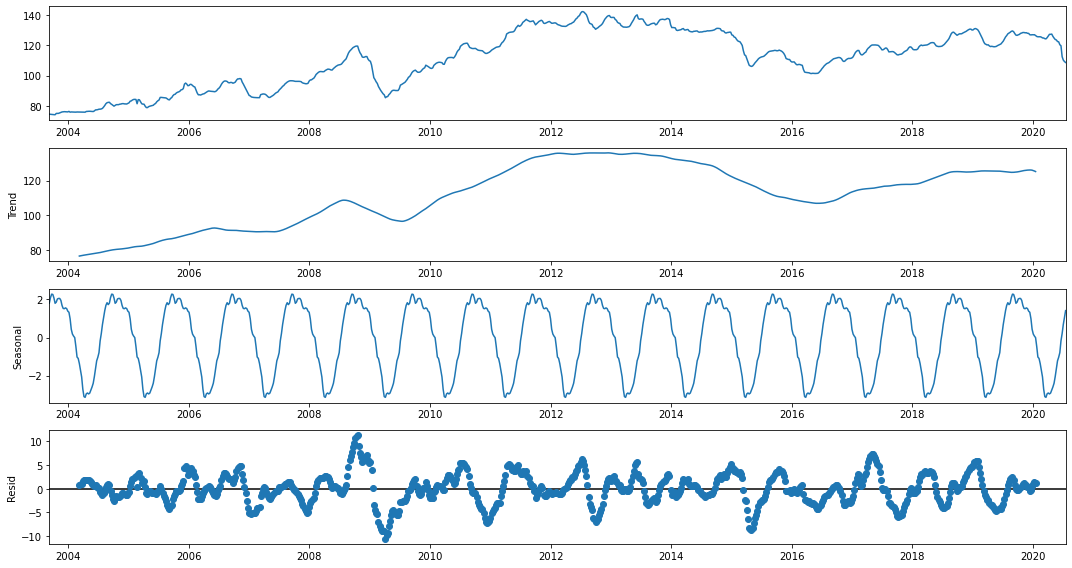

In [18]:
decomposition_model = seasonal_decompose(df,model='additive')
decomposition_model.plot();

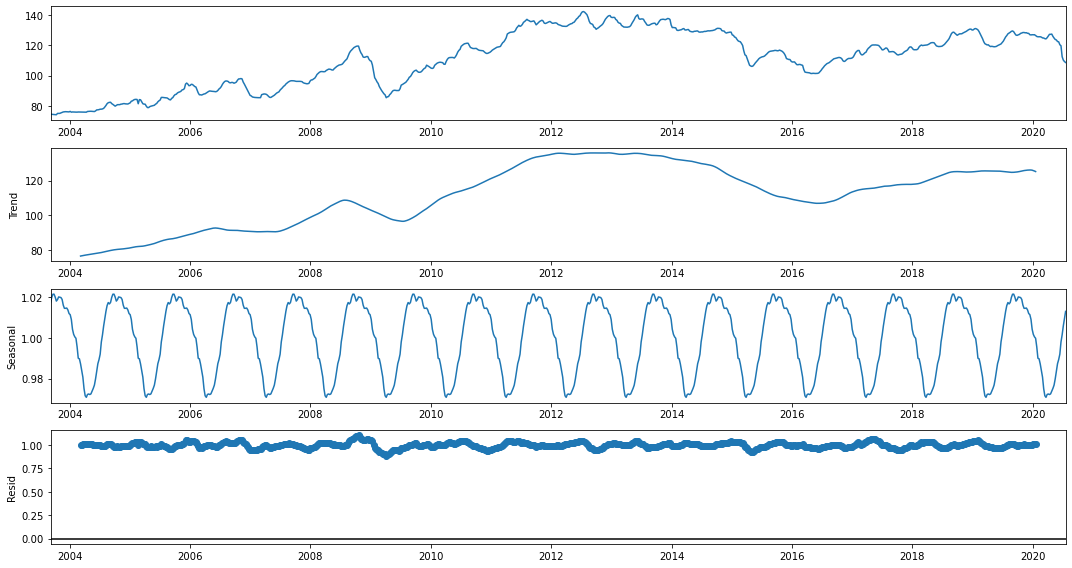

In [19]:
decomposition_model = seasonal_decompose(df,model='multiplicative')
decomposition_model.plot();

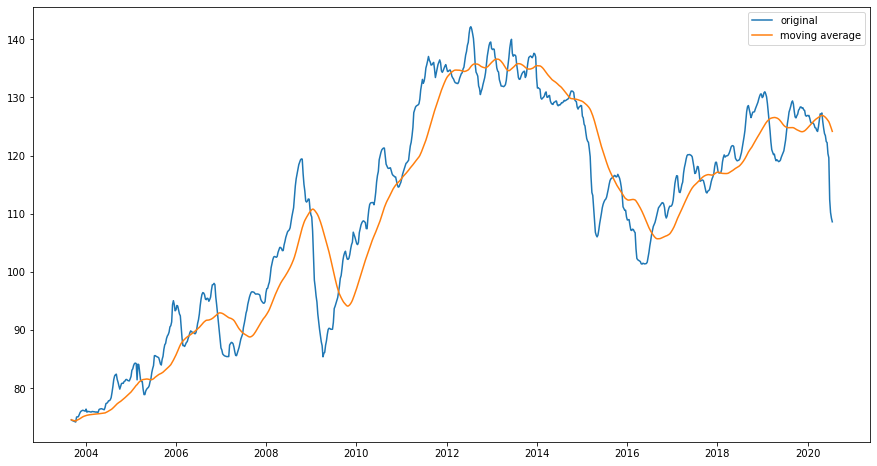

In [24]:
plt.plot(df,label='original')
plt.plot(df.rolling(40,min_periods=0).mean(),label='moving average')
plt.legend(loc='best')
plt.show()

In [23]:
# Model building - Exponential Smoothing Techniques

In [20]:
train = df.iloc[:750]
test = df.iloc[750:]

In [21]:
train.tail()

,USD
time_stamp,
2017-12-17,118.85
2017-12-24,118.87
2017-12-31,118.13
2018-01-07,117.16
2018-01-14,117.01


In [22]:
test.head()

,USD
time_stamp,
2018-01-21,117.04
2018-01-28,117.06
2018-02-04,117.57
2018-02-11,118.91
2018-02-18,119.67


In [23]:
len(train)

750

In [24]:
len(test)

131

##### Simple Exponential Smoothing

In [25]:
SES = SimpleExpSmoothing(train,initialization_method='estimated')
SES_model = SES.fit(smoothing_level=1)
SES_model.summary()

Dep. Variable:,USD,No. Observations:,750
Model:,SimpleExpSmoothing,SSE,512.547
Optimized:,True,AIC,-281.511
Trend:,None,BIC,-272.271
Seasonal:,None,AICC,-281.457
Seasonal Periods:,None,Date:,"Fri, 01 Apr 2022"
Box-Cox:,False,Time:,17:09:46
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,False
initial_level,74.590000,l.0,True


In [26]:
SES_predict = SES_model.forecast(len(test))

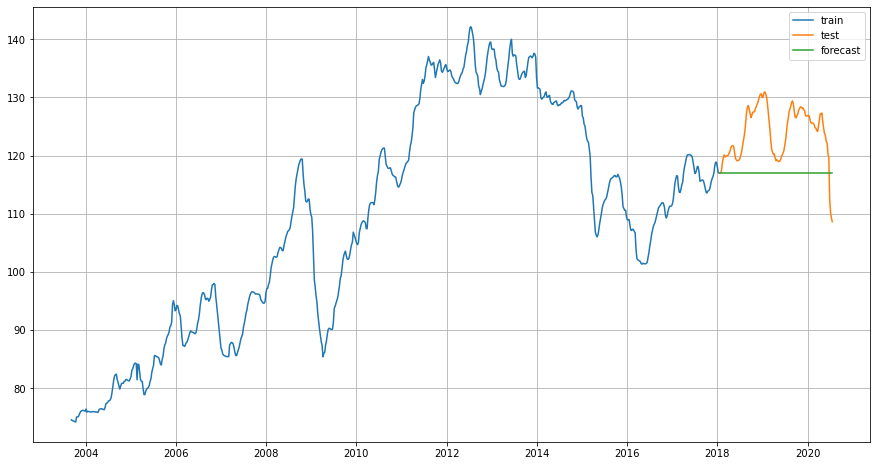

In [27]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(SES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [28]:
print("MAE:",MAE(test['USD'],SES_predict))
print("MAPE:",MAPE(test['USD'],SES_predict))

MAE: 7.424122137404575
MAPE: 5.900270942785817


##### Double Exponential Smoothing

In [29]:
DES = Holt(train,exponential=True,initialization_method='estimated')
DES_model = DES.fit(smoothing_level=0.9000000,
                   smoothing_trend=0.1)
DES_model.summary()

Dep. Variable:,USD,No. Observations:,750
Model:,Holt,SSE,515.563
Optimized:,True,AIC,-273.110
Trend:,Multiplicative,BIC,-254.630
Seasonal:,None,AICC,-272.997
Seasonal Periods:,None,Date:,"Fri, 01 Apr 2022"
Box-Cox:,False,Time:,17:10:30
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_trend,0.1000000,beta,False


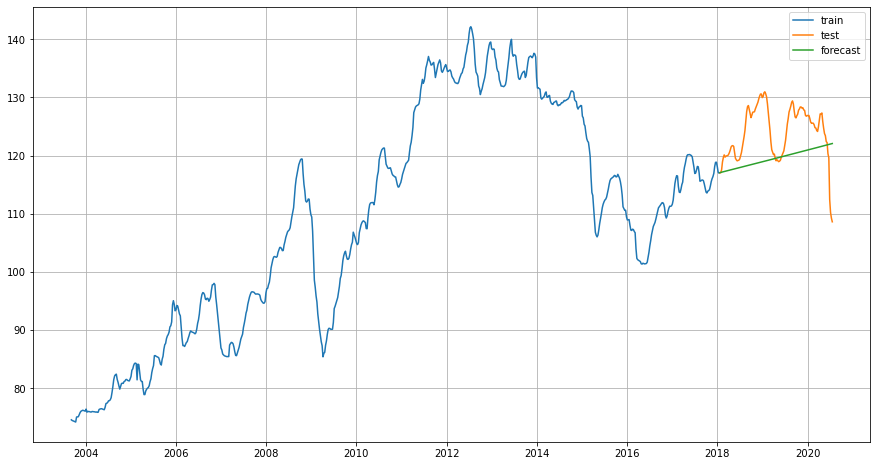

In [30]:
DES_predict = DES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(DES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [31]:
print("MAE:",MAE(test['USD'],DES_predict))
print("MAPE:",MAPE(test['USD'],DES_predict))

MAE: 5.28398921050314
MAPE: 4.210667120696678


##### Triple Exponential Smoothing

In [32]:
TES = ExponentialSmoothing(train,trend='additive',seasonal='multiplicative',initialization_method='estimated')
TES_model = TES.fit(smoothing_level=1,
                   smoothing_trend=0.2096e-11,
                   smoothing_seasonal=2.6174e-02)
TES_model.summary()

Dep. Variable:,USD,No. Observations:,750
Model:,ExponentialSmoothing,SSE,453.880
Optimized:,True,AIC,-264.679
Trend:,Additive,BIC,-5.955
Seasonal:,Multiplicative,AICC,-254.775
Seasonal Periods:,52,Date:,"Fri, 01 Apr 2022"
Box-Cox:,False,Time:,17:11:00
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,False
smoothing_trend,2.096e-12,beta,False


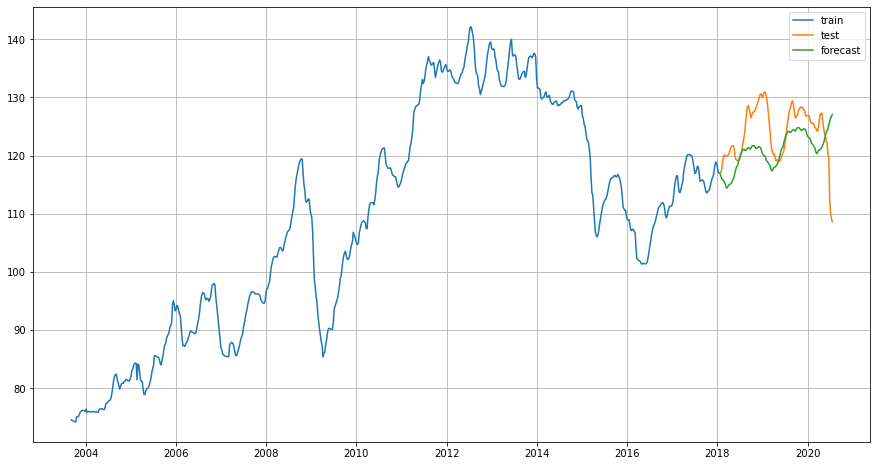

In [33]:
TES_predict = TES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(TES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [35]:
print("MAE:",MAE(test['USD'],TES_predict))
print("MAPE:",MAPE(test['USD'],TES_predict))

MAE: 4.457248489640818
MAPE: 3.5949405640170915


##### ACF and PACF plots

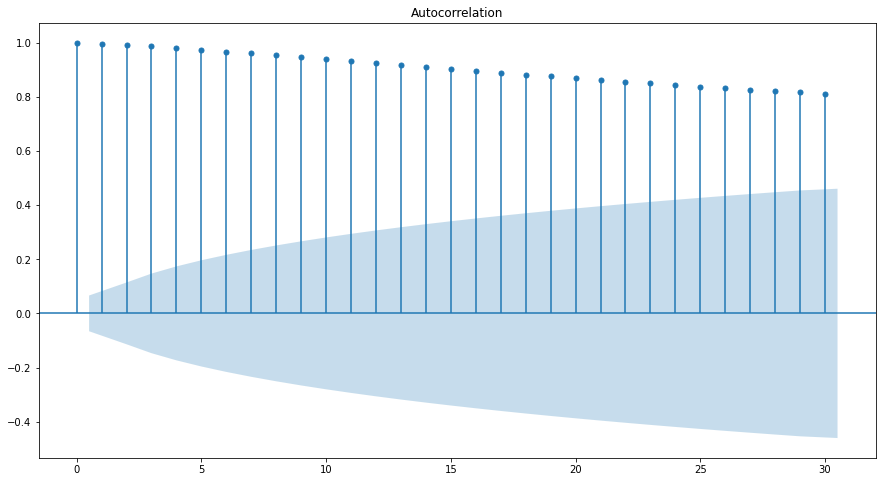

In [36]:
plot_acf(df)
plt.show()

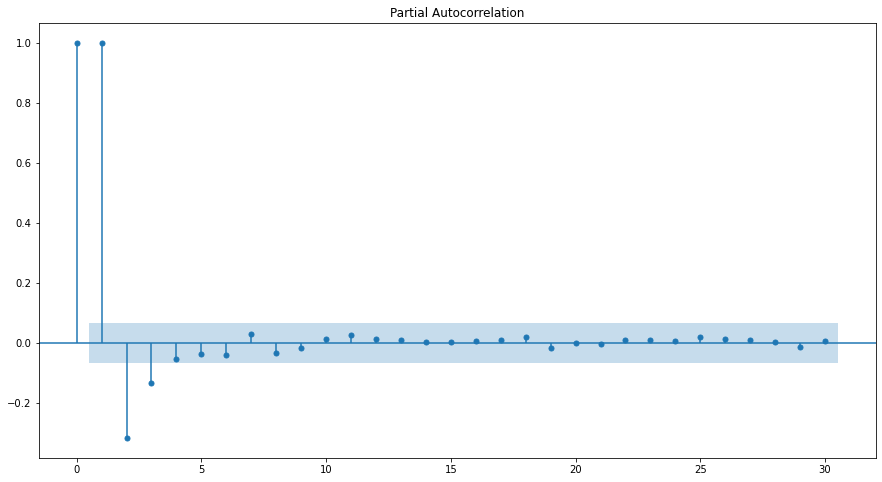

In [37]:
plot_pacf(df)
plt.show()

##### DickyFuller test

In [38]:
observations = df.values
df_results = adfuller(observations)
df_results

(-2.241701438997196,
 0.1914597186847965,
 7,
 873,
 {'1%': -3.4378627516320006,
  '5%': -2.8648563831383322,
  '10%': -2.568535885040459},
 1733.7531552192856)

In [87]:
##### Non-stationary series -- proceed with ARIMA & SARIMA model

In [39]:
diff_val = df.diff(periods=1).dropna()
obs_diff = diff_val.values
diff_res = adfuller(obs_diff)
diff_res

(-7.912712139667916,
 3.909122933667641e-12,
 6,
 873,
 {'1%': -3.4378627516320006,
  '5%': -2.8648563831383322,
  '10%': -2.568535885040459},
 1736.0569042937727)

##### ARIMA Model

In [146]:
import itertools

In [147]:
p = q = range(0,4)
d = range(1,2)
pdq = list(itertools.product(p,d,q))
print("Parameter combinations are:")
for i in range(1,len(pdq)):
    print("ARIMA",pdq[i])

Parameter combinations are:
ARIMA (0, 1, 1)
ARIMA (0, 1, 2)
ARIMA (0, 1, 3)
ARIMA (1, 1, 0)
ARIMA (1, 1, 1)
ARIMA (1, 1, 2)
ARIMA (1, 1, 3)
ARIMA (2, 1, 0)
ARIMA (2, 1, 1)
ARIMA (2, 1, 2)
ARIMA (2, 1, 3)
ARIMA (3, 1, 0)
ARIMA (3, 1, 1)
ARIMA (3, 1, 2)
ARIMA (3, 1, 3)


In [148]:
df_score_arima = pd.DataFrame(columns=['param','aic'])
df_score_arima

,param,aic


In [149]:
from warnings import filterwarnings
filterwarnings('ignore')

In [150]:
for param in pdq:
    try:
        model = ARIMA(train,order=param)
        arima_results = model.fit()
        print("ARIMA",param,"AIC:",arima_results.aic)
        df_score_arima = df_score_arima.append({'param':param,'aic':arima_results.aic},ignore_index=True)
    except:
        continue

ARIMA (0, 1, 0) AIC: 1841.9199821749273
ARIMA (0, 1, 1) AIC: 1566.4932845670255
ARIMA (0, 1, 2) AIC: 1486.4048854630596
ARIMA (0, 1, 3) AIC: 1474.87594358769
ARIMA (1, 1, 0) AIC: 1451.1341466615336
ARIMA (1, 1, 1) AIC: 1452.7425179975269
ARIMA (1, 1, 2) AIC: 1453.306939108325
ARIMA (1, 1, 3) AIC: 1452.8224440507229
ARIMA (2, 1, 0) AIC: 1452.788228038787
ARIMA (2, 1, 1) AIC: 1453.1627249115886
ARIMA (2, 1, 2) AIC: 1454.4456466523393
ARIMA (2, 1, 3) AIC: 1454.6000644346577
ARIMA (3, 1, 0) AIC: 1453.879409598151
ARIMA (3, 1, 1) AIC: 1454.2317951939601
ARIMA (3, 1, 2) AIC: 1453.7639338265267
ARIMA (3, 1, 3) AIC: 1449.9729195193186


In [151]:
df_score_arima.sort_values('aic')

,param,aic
15,"(3, 1, 3)",1449.972920
4,"(1, 1, 0)",1451.134147
5,"(1, 1, 1)",1452.742518
8,"(2, 1, 0)",1452.788228
7,"(1, 1, 3)",1452.822444
9,"(2, 1, 1)",1453.162725
6,"(1, 1, 2)",1453.306939
14,"(3, 1, 2)",1453.763934
12,"(3, 1, 0)",1453.879410
13,"(3, 1, 1)",1454.231795


In [40]:
arima_model = ARIMA(train,(3,1,3))
arima_results = arima_model.fit()
print(arima_results.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.USD   No. Observations:                  749
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -716.986
Method:                       css-mle   S.D. of innovations              0.630
Date:                Fri, 01 Apr 2022   AIC                           1449.973
Time:                        17:15:45   BIC                           1486.923
Sample:                    09-14-2003   HQIC                          1464.211
                         - 01-14-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0548      0.071      0.777      0.437      -0.084       0.193
ar.L1.D.USD     0.5795      0.160      3.629      0.000       0.267       0.892
ar.L2.D.USD    -0.6328      0.164     -3.867    

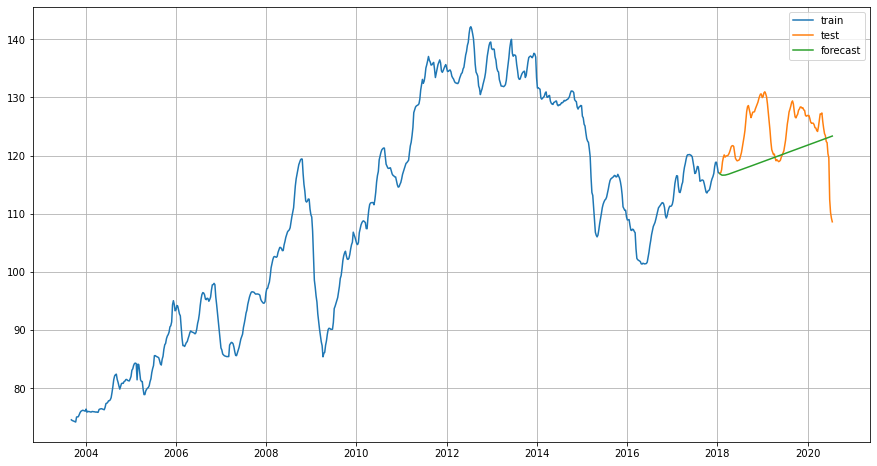

In [41]:
forecasted_values_arima = pd.Series(arima_results.forecast(len(test))[0],index=test.index)

# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecasted_values_arima,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [42]:
print("MAE:",MAE(test['USD'],forecasted_values_arima))
print("MAPE:",MAPE(test['USD'],forecasted_values_arima))

MAE: 5.195232599263129
MAPE: 4.150366432314284


##### SARIMA Model

In [155]:
import itertools

In [157]:
p = q = range(0,4)
d = range(1,2)
pdq = list(itertools.product(p,d,q))
pdq_seasonal = [(x[0],x[1],x[2],4) for x in list(itertools.product(p,d,q))]

df_score = pd.DataFrame(columns=['param','seasonal','aic'])
df_score

,param,seasonal,aic


In [158]:
for param in pdq:
    for seasonal_param in pdq_seasonal:
        model = SARIMAX(train,
                       order = param,
                       seasonal_order = seasonal_param,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
        sarimax_results = model.fit()
        print("SARIMAX",param,seasonal_param,'AIC:',sarimax_results.aic)
        df_score = df_score.append({'param':param,'seasonal':seasonal_param,'aic':sarimax_results.aic},ignore_index=True)

SARIMAX (0, 1, 0) (0, 1, 0, 4) AIC: 2130.5467683635134
SARIMAX (0, 1, 0) (0, 1, 1, 4) AIC: 1841.922500384769
SARIMAX (0, 1, 0) (0, 1, 2, 4) AIC: 1796.2825807552085
SARIMAX (0, 1, 0) (0, 1, 3, 4) AIC: 1785.8811786517203
SARIMAX (0, 1, 0) (1, 1, 0, 4) AIC: 2008.9369114797357
SARIMAX (0, 1, 0) (1, 1, 1, 4) AIC: 1801.224336106029
SARIMAX (0, 1, 0) (1, 1, 2, 4) AIC: 1794.6995502930804
SARIMAX (0, 1, 0) (1, 1, 3, 4) AIC: 1787.8575598937941
SARIMAX (0, 1, 0) (2, 1, 0, 4) AIC: 1965.1879244349668
SARIMAX (0, 1, 0) (2, 1, 1, 4) AIC: 1796.5250878844731
SARIMAX (0, 1, 0) (2, 1, 2, 4) AIC: 1796.8202025710425
SARIMAX (0, 1, 0) (2, 1, 3, 4) AIC: 1787.5867803092633
SARIMAX (0, 1, 0) (3, 1, 0, 4) AIC: 1936.7101766474088
SARIMAX (0, 1, 0) (3, 1, 1, 4) AIC: 1792.398291679303
SARIMAX (0, 1, 0) (3, 1, 2, 4) AIC: 1792.912369922356
SARIMAX (0, 1, 0) (3, 1, 3, 4) AIC: 1792.3720677848546
SARIMAX (0, 1, 1) (0, 1, 0, 4) AIC: 1924.161087073171
SARIMAX (0, 1, 1) (0, 1, 1, 4) AIC: 1567.8682714878132
SARIMAX (0, 1, 

SARIMAX (2, 1, 1) (1, 1, 2, 4) AIC: 1450.3048045944909
SARIMAX (2, 1, 1) (1, 1, 3, 4) AIC: 1446.2476518398073
SARIMAX (2, 1, 1) (2, 1, 0, 4) AIC: 1638.8397870575304
SARIMAX (2, 1, 1) (2, 1, 1, 4) AIC: 1451.5258525786833
SARIMAX (2, 1, 1) (2, 1, 2, 4) AIC: 1452.373945594678
SARIMAX (2, 1, 1) (2, 1, 3, 4) AIC: 1447.9207153187162
SARIMAX (2, 1, 1) (3, 1, 0, 4) AIC: 1596.366361718736
SARIMAX (2, 1, 1) (3, 1, 1, 4) AIC: 1447.928224006674
SARIMAX (2, 1, 1) (3, 1, 2, 4) AIC: 1448.3877282287776
SARIMAX (2, 1, 1) (3, 1, 3, 4) AIC: 1449.927234911481
SARIMAX (2, 1, 2) (0, 1, 0, 4) AIC: 1680.8826900493232
SARIMAX (2, 1, 2) (0, 1, 1, 4) AIC: 1452.5657231655582
SARIMAX (2, 1, 2) (0, 1, 2, 4) AIC: 1449.7381938524159
SARIMAX (2, 1, 2) (0, 1, 3, 4) AIC: 1446.3172259110906
SARIMAX (2, 1, 2) (1, 1, 0, 4) AIC: 1644.9391994893685
SARIMAX (2, 1, 2) (1, 1, 1, 4) AIC: 1454.5657034029114
SARIMAX (2, 1, 2) (1, 1, 2, 4) AIC: 1450.5070683880226
SARIMAX (2, 1, 2) (1, 1, 3, 4) AIC: 1446.7904049333158
SARIMAX (2, 1,

In [159]:
df_score.sort_values('aic')

,param,seasonal,aic
115,"(1, 1, 3)","(0, 1, 3, 4)",1434.502510
179,"(2, 1, 3)","(0, 1, 3, 4)",1436.003736
119,"(1, 1, 3)","(1, 1, 3, 4)",1436.357345
183,"(2, 1, 3)","(1, 1, 3, 4)",1437.842252
243,"(3, 1, 3)","(0, 1, 3, 4)",1437.985500
...,...,...,...
16,"(0, 1, 1)","(0, 1, 0, 4)",1924.161087
12,"(0, 1, 0)","(3, 1, 0, 4)",1936.710177
8,"(0, 1, 0)","(2, 1, 0, 4)",1965.187924
4,"(0, 1, 0)","(1, 1, 0, 4)",2008.936911


In [43]:
model = SARIMAX(train,
                       order = (3,1,3),
                       seasonal_order = (3,1,3,7),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarimax_results = model.fit()

In [44]:
print(sarimax_results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                               USD   No. Observations:                  750
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 7)   Log Likelihood                -710.749
Date:                           Fri, 01 Apr 2022   AIC                           1447.499
Time:                                   17:16:25   BIC                           1506.975
Sample:                               09-07-2003   HQIC                          1470.464
                                    - 01-14-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0881      0.051     40.546      0.000       1.987       2.189
ar.L2         -1.8368      0.081    -22.695

In [45]:
forecast = sarimax_results.forecast(len(test))

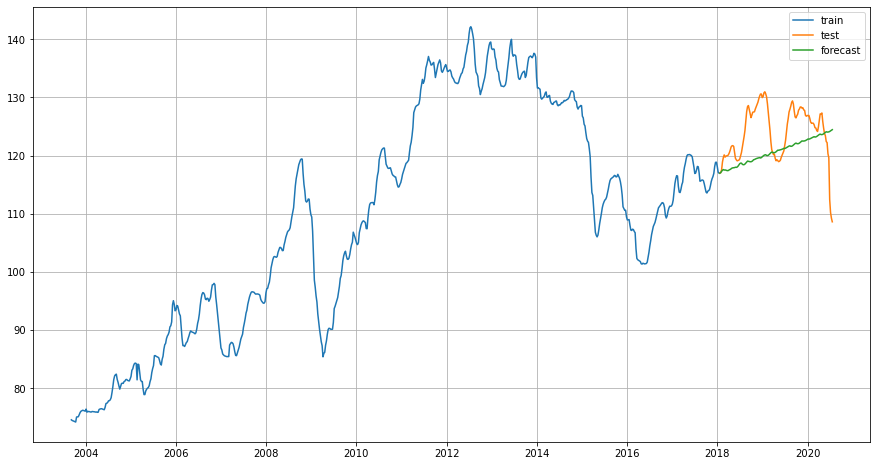

In [46]:
# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecast,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [47]:
print("MAE:",MAE(test['USD'],forecast))
print("MAPE:",MAPE(test['USD'],forecast))

MAE: 4.580060680889245
MAPE: 3.6662347773936053


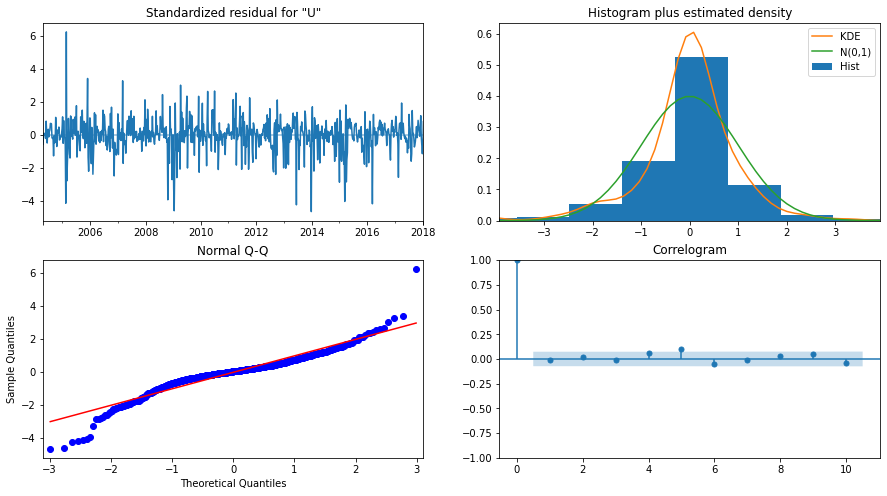

In [48]:
sarimax_results.plot_diagnostics();

# ARCH/GARCH Model

In [49]:
df

,USD
time_stamp,
2003-09-07,74.59
2003-09-14,74.47
2003-09-21,74.42
2003-09-28,74.35
2003-10-05,74.28
...,...
2020-06-21,119.64
2020-06-28,112.45
2020-07-05,110.23


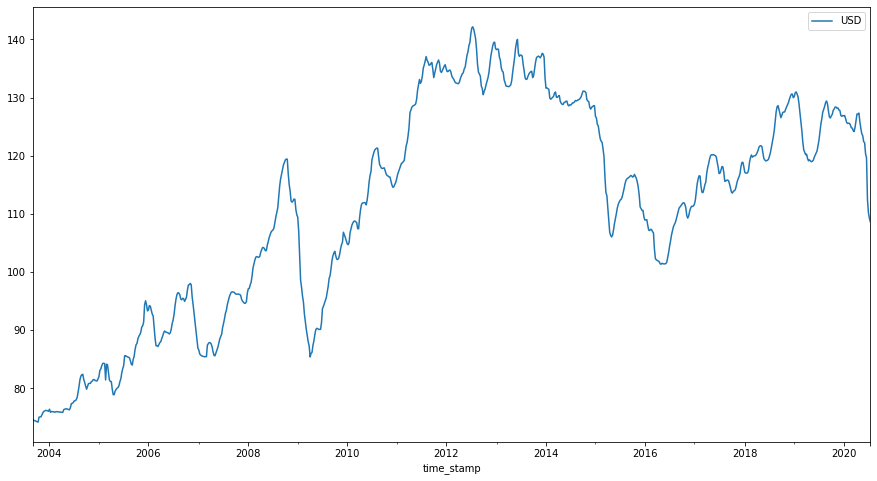

In [50]:
df.plot()
plt.show()

In [51]:
TES = ExponentialSmoothing(df,trend='additive',seasonal='multiplicative',initialization_method='estimated')
TES_model = TES.fit(smoothing_level=1,
                   smoothing_trend=0.2096e-11,
                   smoothing_seasonal=2.6174e-02)
TES_model.summary()

Dep. Variable:,USD,No. Observations:,881
Model:,ExponentialSmoothing,SSE,583.645
Optimized:,True,AIC,-250.765
Trend:,Additive,BIC,16.974
Seasonal:,Multiplicative,AICC,-242.439
Seasonal Periods:,52,Date:,"Fri, 01 Apr 2022"
Box-Cox:,False,Time:,17:25:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,False
smoothing_trend,2.096e-12,beta,False


In [52]:
resid = TES_model.resid

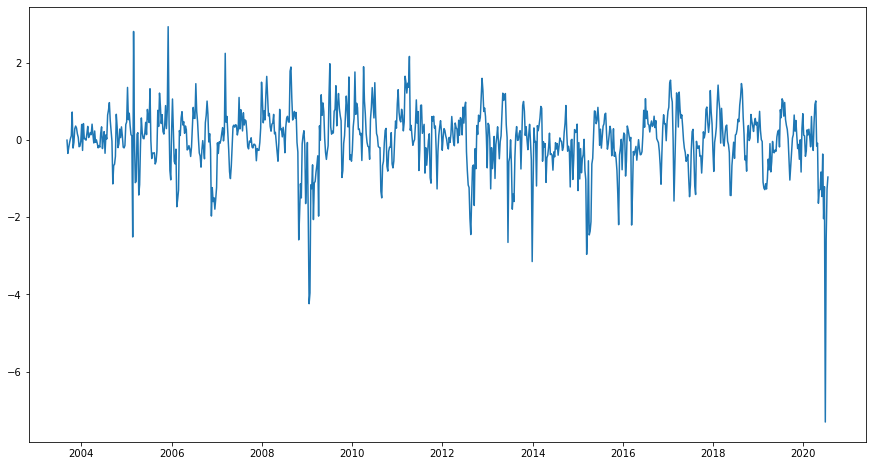

In [53]:
plt.plot(resid)
plt.show()

In [55]:
resid_df = pd.DataFrame(resid,columns=['residuals'])
resid_df.shape

(881, 1)

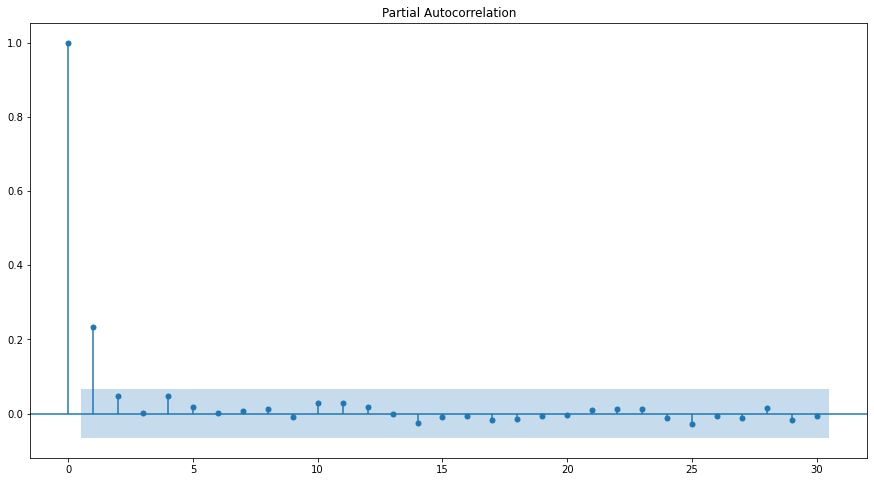

In [56]:
plot_pacf(resid_df**2)
plt.show()

##### ARCH - 1 Model

In [61]:
model_1 = arch_model(resid_df,p=1,q=0)
model_fit_1 = model_1.fit(disp='off')
model_fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -967.151
Distribution:                  Normal   AIC:                           1940.30
Method:            Maximum Likelihood   BIC:                           1954.64
                                        No. Observations:                  881
Date:                Fri, Apr 01 2022   Df Residuals:                      880
Time:                        17:34:53   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0899  4.044e-02      2.222  2.631e-02 [1.058e-02,  0.169]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.3226  4.034e-02      7.996  1.282e-15 [  0.244,  0.402]
alpha[1]       0.5887      0.161      3.651  2.607e-04 [  0.273,  0.905]
========================================================================

Covariance estimator: robust
"""

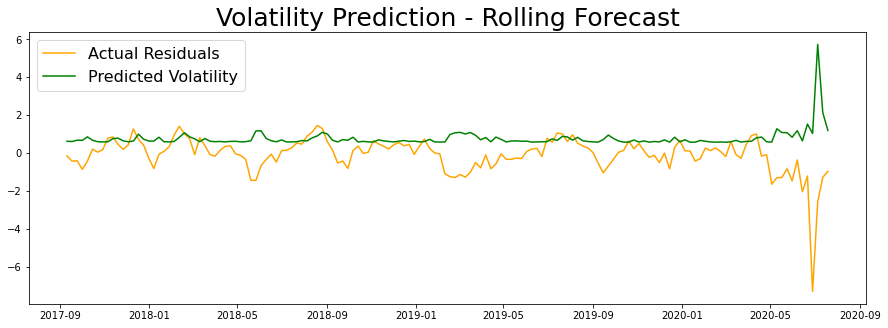

In [62]:
rolling_predictions = []
test_size = 150

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=1, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### ARCH - 2 Model

In [63]:
model_1 = arch_model(resid_df,p=2,q=0)
model_fit_1 = model_1.fit(disp='off')
model_fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -962.340
Distribution:                  Normal   AIC:                           1932.68
Method:            Maximum Likelihood   BIC:                           1951.80
                                        No. Observations:                  881
Date:                Fri, Apr 01 2022   Df Residuals:                      880
Time:                        17:36:33   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0839  3.664e-02      2.290  2.202e-02 [1.209e-02,  0.156]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.3041  4.229e-02      7.190  6.476e-13    [  0.221,  0.387]
alpha[1]       0.4869      0.106      4.590  4.436e-06    [  0.279,  0.695]
alpha[2]       0.1021  7.895e-02      1.293      0.196 [-5.262e-02,  0.257]
===========================================================================

Covariance estimator: robust
"""

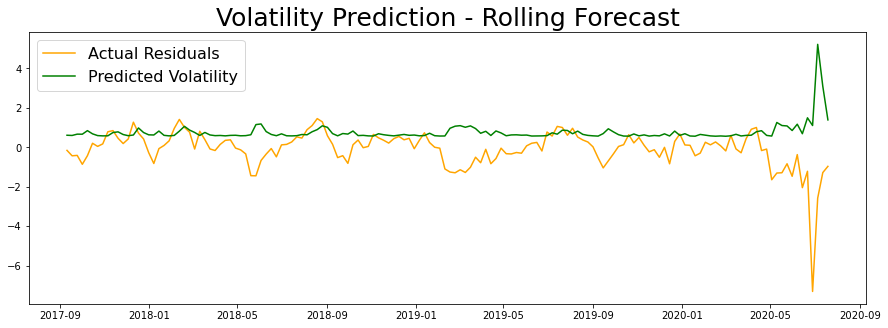

In [64]:
rolling_predictions = []
test_size = 150

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=2, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### ARCH - 3 Model

In [65]:
model_1 = arch_model(resid_df,p=3,q=0)
model_fit_1 = model_1.fit(disp='off')
model_fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -961.540
Distribution:                  Normal   AIC:                           1933.08
Method:            Maximum Likelihood   BIC:                           1956.99
                                        No. Observations:                  881
Date:                Fri, Apr 01 2022   Df Residuals:                      880
Time:                        17:37:17   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0806  3.856e-02      2.091  3.654e-02 [5.047e-03,  0.156]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.2885  4.350e-02      6.632  3.308e-11 [  0.203,  0.374]
alpha[1]       0.5081      0.109      4.664  3.107e-06 [  0.295,  0.722]
alpha[2]       0.0716      0.106      0.677      0.499 [ -0.136,  0.279]
alpha[3]       0.0466  7.901e-02      0.589      0.556 [ -0.108,  0.201]
========================================================================

Covariance estimator: robust
"""

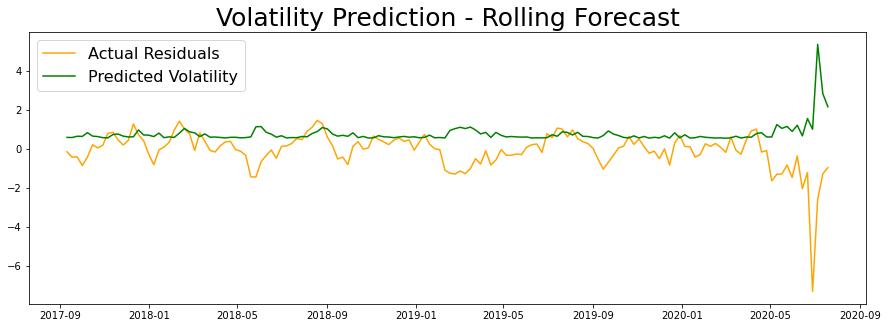

In [66]:
rolling_predictions = []
test_size = 150

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### ARCH - 4 Model

In [67]:
model_1 = arch_model(resid_df,p=4,q=0)
model_fit_1 = model_1.fit(disp='off')
model_fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -960.406
Distribution:                  Normal   AIC:                           1932.81
Method:            Maximum Likelihood   BIC:                           1961.50
                                        No. Observations:                  881
Date:                Fri, Apr 01 2022   Df Residuals:                      880
Time:                        17:37:49   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0823  3.813e-02      2.159  3.082e-02 [7.604e-03,  0.157]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2766  4.640e-02      5.961  2.510e-09    [  0.186,  0.368]
alpha[1]       0.5066      0.109      4.669  3.026e-06    [  0.294,  0.719]
alpha[2]       0.0537  9.493e-02      0.565      0.572    [ -0.132,  0.240]
alpha[3]       0.0389  6.803e-02      0.572      0.567 [-9.441e-02,  0.172]
alpha[4]       0.0456  5.684e-02      0.802      0.423 [-6.585e-02,  0.157]
===========================================================================

Covariance estimator: robust
"""

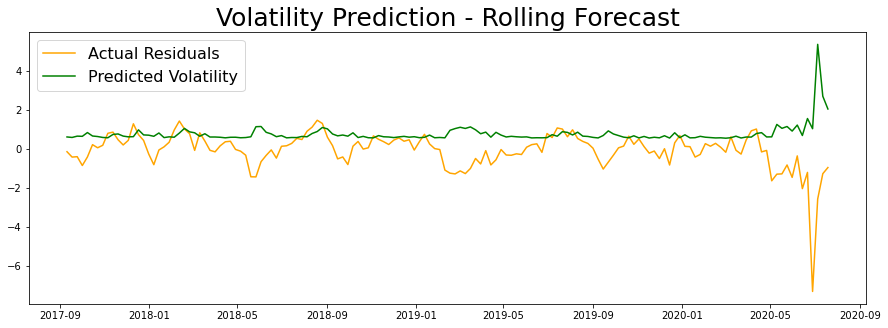

In [68]:
rolling_predictions = []
test_size = 150

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=4, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### GARCH - (1,1) Model

In [69]:
model_1 = arch_model(resid_df,p=1,q=1)
model_fit_1 = model_1.fit(disp='off')
model_fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -961.137
Distribution:                  Normal   AIC:                           1930.27
Method:            Maximum Likelihood   BIC:                           1949.40
                                        No. Observations:                  881
Date:                Fri, Apr 01 2022   Df Residuals:                      880
Time:                        17:48:10   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0790  3.848e-02      2.054  3.997e-02 [3.620e-03,  0.154]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2106  9.649e-02      2.183  2.907e-02 [2.148e-02,  0.400]
alpha[1]       0.4524      0.141      3.207  1.341e-03   [  0.176,  0.729]
beta[1]        0.2647      0.235      1.125      0.261   [ -0.197,  0.726]
==========================================================================

Covariance estimator: robust
"""

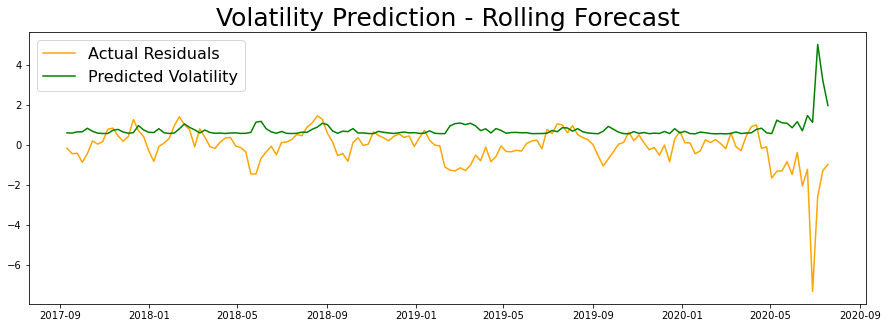

In [70]:
rolling_predictions = []
test_size = 150

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

# Future Predictions

##### ARCH - 1 Prediction

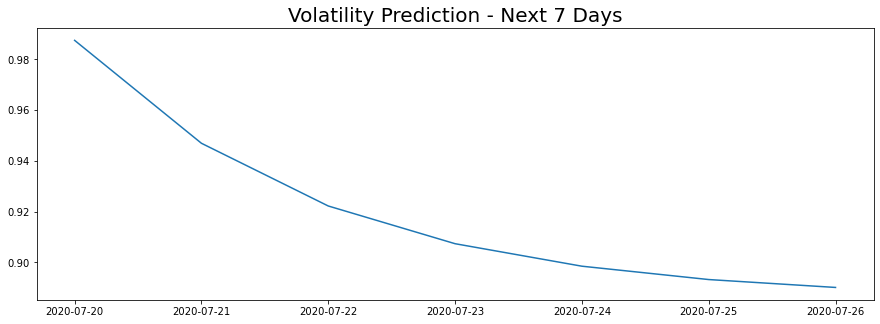

In [71]:
final_df = resid_df
final_model = arch_model(final_df, p=1, q=0)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### ARCH - 2 Prediction

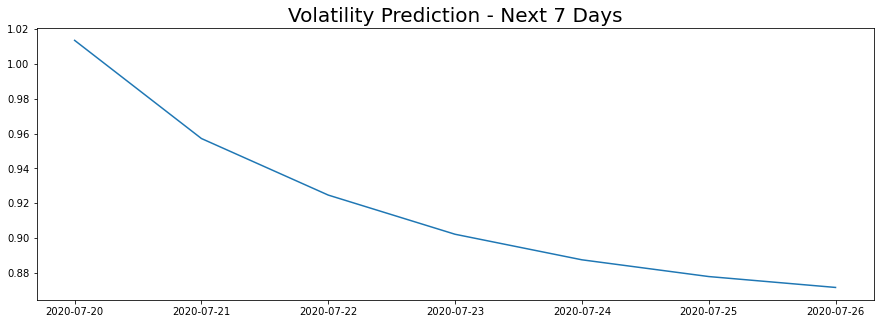

In [72]:
final_df = resid_df
final_model = arch_model(final_df, p=2, q=0)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### ARCH - 3 Prediction

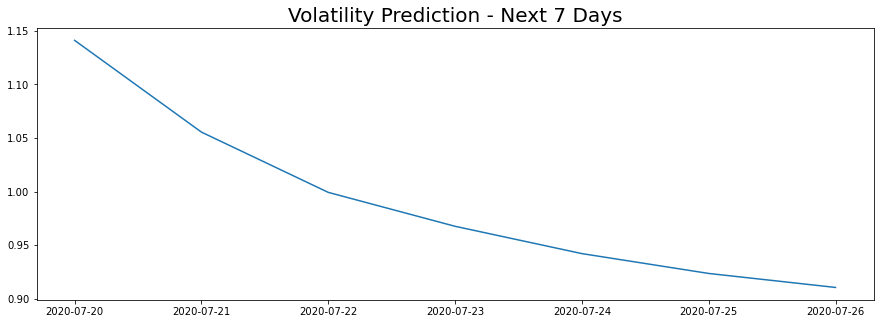

In [73]:
final_df = resid_df
final_model = arch_model(final_df, p=3, q=0)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### ARCH - 4 Prediction

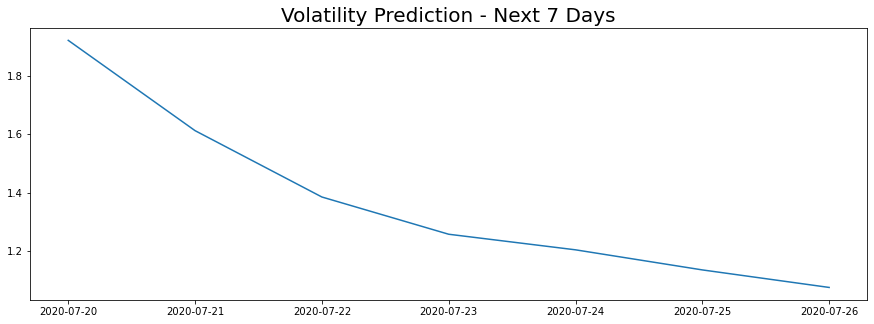

In [74]:
final_df = resid_df
final_model = arch_model(final_df, p=4, q=0)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### GARCH (1,1) Prediction

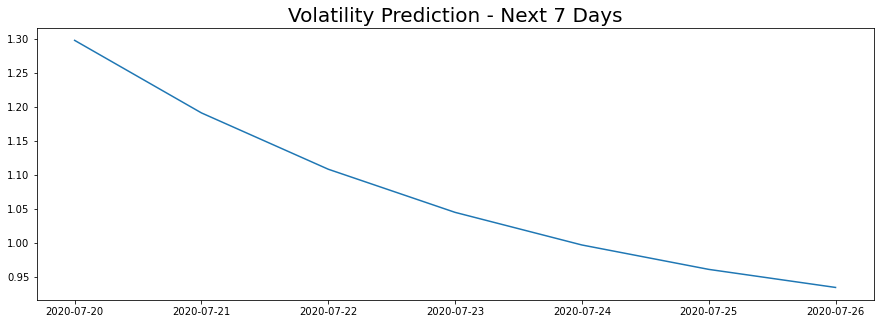

In [75]:
final_df = resid_df
final_model = arch_model(final_df, p=1, q=1)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### Conclusion:

- Based on the significance of the model parameters and the AIC Score, we can conclude that the ARCH - 1 Model is the best fit model and the future predictions can be done using this model.